In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings as ws
ws.defaultaction = "ignore"

In [2]:
print("lets Start")

lets Start


In [3]:
df = pd.read_csv("/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv")

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [6]:
df.shape

(10668, 9)

In [7]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [11]:
df.model.value_counts().shape

(26,)

In [13]:
df.transmission.value_counts().reset_index()

,index,transmission
0,Manual,4369
1,Semi-Auto,3591
2,Automatic,2708


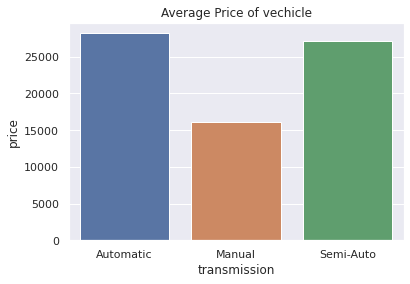

In [21]:
# Checking the price of car by transimission typ
price_by_transmission = df.groupby("transmission")['price'].mean().reset_index()
plt.title("Average Price of vechicle")
sns.set()
sns.barplot(x="transmission", y ="price", data = price_by_transmission)
plt.show()

In [25]:
milage_by_fuel = df.groupby("fuelType")["mileage"].mean().reset_index()
milage_by_fuel

,fuelType,mileage
0,Diesel,30220.968263
1,Hybrid,28887.892857
2,Petrol,18863.487656


In [38]:
cleaned_df = pd.concat([df,pd.get_dummies(df.fuelType), pd.get_dummies(df.transmission)], axis =1)

In [39]:
cleaned_df = cleaned_df.drop(["transmission", "fuelType","model"], axis = 1)

In [40]:
cleaned_df.head()

,year,price,mileage,tax,mpg,engineSize,Diesel,Hybrid,Petrol,Automatic,Manual,Semi-Auto
0,2017,12500,15735,150,55.4,1.4,0,0,1,0,1,0
1,2016,16500,36203,20,64.2,2.0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,0,0,1,0,1,0
3,2017,16800,25952,145,67.3,2.0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,1,0


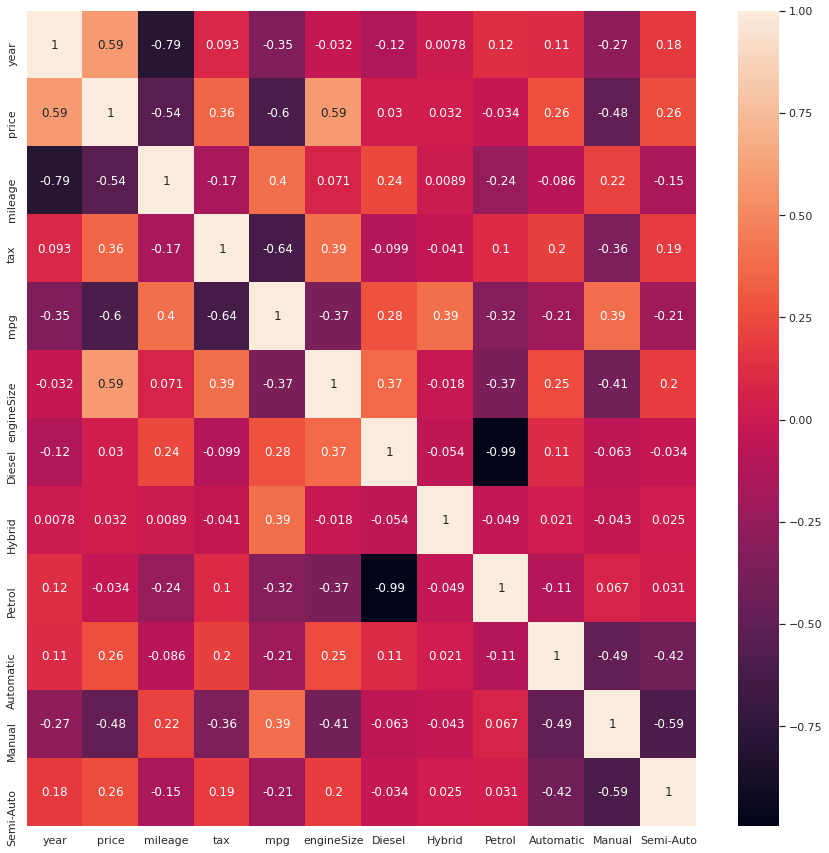

In [42]:
plt.figure(figsize = (15,15))
sns.heatmap(cleaned_df.corr(), annot = True)

In [45]:
abs (cleaned_df.corr()["price"]).sort_values(ascending =False)

price         1.000000
mpg           0.600334
year          0.592581
engineSize    0.591262
mileage       0.535357
Manual        0.483137
tax           0.356157
Automatic     0.264294
Semi-Auto     0.259356
Petrol        0.033733
Hybrid        0.031946
Diesel        0.030452
Name: price, dtype: float64

In [76]:
# Fitting Regression Model
X = cleaned_df.drop("price", axis = 1)
y = cleaned_df["price"]

In [82]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state =1)

In [83]:
print(X_train.shape)
print(X_test.shape)
print (y_train.shape)
print (y_test.shape)

(9067, 11)
(1601, 11)
(9067,)
(1601,)


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred =lin_reg.predict(X_test)
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2score = r2_score(y_test,y_pred)

In [89]:
print("R2 score is ", r2score)
print("rmse is ", rmse)

R2 score is  0.8076888308816783
rmse is  4921.610174868612


In [98]:
y_pred.shape
y_test.shape

(1601,)

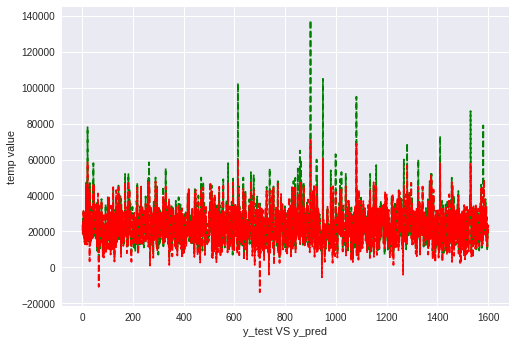

In [104]:
temp = [i for i in  range(1, 1602)]
plt.style.use("seaborn")
plt.plot(temp,y_test,linestyle = "--", color = "green")
plt.plot(temp,y_pred,linestyle = "--", color = "red")
plt.xlabel("y_test VS y_pred")
plt.ylabel("temp value")
plt.legend()
plt.show()

In [105]:
#  Trying the Random Forest Regressior Model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [106]:
forest_y_pred = forest.predict(X_test)
# Calculating RMSE
forest_rmse = np.sqrt(mean_squared_error(y_test,forest_y_pred))
forest_r2score = r2_score(y_test,forest_y_pred)
print("R2 score is ", forest_r2score)
print("rmse is ", forest_rmse )

R2 score is  0.9344112072439141
rmse is  2874.218472275761


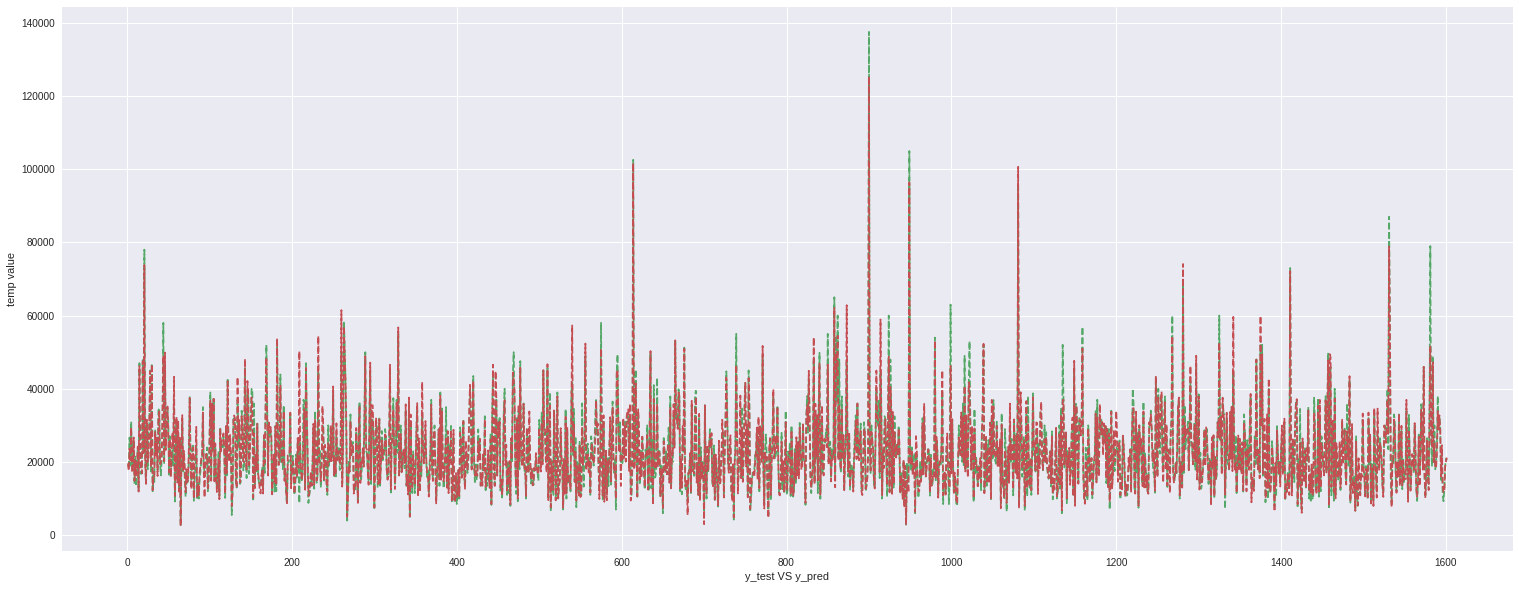

In [112]:
# Noe to model looks good 
temp = [i for i in  range(1, 1602)]
plt.figure(figsize = (26,10))
plt.style.use("seaborn")
plt.plot(temp,y_test,"--g")
plt.plot(temp,forest_y_pred,"--r")
plt.xlabel("y_test VS y_pred")
plt.ylabel("temp value")
plt.legend()
plt.show()

In [121]:
# Plotting proper chart using seaborn
resulting = pd.DataFrame(y_test)

In [126]:
resulting.reset_index().drop("index",axis =1)
resulting['prediction'] = forest_y_pred

In [132]:
resulting.head()

,price,prediction
4534,19000,19601
8107,18799,17628
4674,26664,23608
3878,18990,20506
5519,31000,29479


In [131]:
resulting.prediction = resulting.prediction.astype(int)

In [139]:
resulting.reset_index()

,index,price,prediction
0,4534,19000,19601
1,8107,18799,17628
2,4674,26664,23608
3,3878,18990,20506
4,5519,31000,29479
...,...,...,...
1596,8014,9284,11695
1597,8095,12499,11828
1598,79,18700,18611
1599,975,20888,20194


# Upvote it if yo find it useful  :)